In [1]:
# A generic genetic algorithm
import random
import numpy as np
import matplotlib.pyplot as plt
from client import get_errors
from io import StringIO
from config import SECRET_KEY
from utils import POPULATION_SIZE, SPLIT_POINT, FEATURE_VECTOR_SIZE, MUTATION_COEFF
from helpers import mkdir_p, get_train_validation_errors, get_rank_and_probabilities, fitness, select_parents, cross_over, mutate, plot_graph, initialize_params

from errno import EEXIST
from os import makedirs, path

[[ 0.00000000e+00  0.00000000e+00]
 [ 6.27937040e+00 -1.45799022e-12]
 [-2.28980078e-13 -2.28980078e-13]
 [ 4.62010753e-11  4.62010753e-11]
 [-1.75214813e-10 -1.75214813e-10]
 [-1.83669770e-15 -1.83669770e-15]
 [ 8.52944060e-16  8.52944060e-16]
 [ 2.29423303e-05  2.29423303e-05]
 [-2.04721003e-06 -2.04721003e-06]
 [-1.59792834e-08 -1.59792834e-08]
 [ 9.98214034e-10 -6.41889788e+00]]
Initial params:

[[ 0.00000000e+00  0.00000000e+00]
 [ 6.27937040e+00 -1.45799022e-12]
 [-2.28980078e-13 -2.28980078e-13]
 [ 4.62010753e-11  4.62010753e-11]
 [-1.75214813e-10 -1.75214813e-10]
 [-1.83669770e-15 -1.83669770e-15]
 [ 8.52944060e-16  8.52944060e-16]
 [ 2.29423303e-05  2.29423303e-05]
 [-2.04721003e-06 -2.04721003e-06]
 [-1.59792834e-08 -1.59792834e-08]
 [ 9.98214034e-10 -6.41889788e+00]]
Rank array
[1 2]
All errors
[[13504842102.92983, 368344514440.6409], [1.8699220255774645e+34, 3.537659418191892e+34]]
Best offspring Gen errors
[[1.35048421e+10 3.68344514e+11]
 [0.00000000e+00 0.00000000e+00]
 

/home/vishal/Volume_D/sem_4/Courses/Machine, Data and Learning/Assignments/Assignment2/Vishal/MDL-Project/helpers.py:147: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


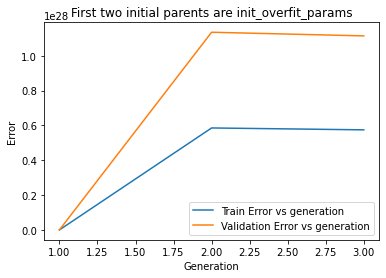

In [2]:
init_overfit_params, init_params = initialize_params()
NO_OF_GENERATIONS = 3
generation_errors = np.zeros(shape=(NO_OF_GENERATIONS, 2), dtype=float)
params = np.zeros(shape=(11, POPULATION_SIZE), dtype=float)
np.copyto(params, init_params)
print("Initial params:\n")
print(init_params)
target_directory = "Results/3-01/run9"
mkdir_p(target_directory)
f = open("{}/params.txt".format(target_directory), "w")
#f.write("Run 1 of 27th feb is continued, we started with the final parameters of previous run i.e. run4 and simulated x more generations where x =\n" + str(NO_OF_GENERATIONS) + "\n")
f.write("Starting all over again with new root population\n")
f.write("No of generations: " + str(NO_OF_GENERATIONS) + "\n")
f.write("Population size: " + str(POPULATION_SIZE) + "\n")
f.write("Mutation coefficient: " + str(MUTATION_COEFF) + "\n")
f.write("Split point: " + str(SPLIT_POINT) + "\n")
f.write("One offspring per pair\n")

for i in range(NO_OF_GENERATIONS):
    train_validation_errors = None
    fitness_score_array = None
    rank_array = None
    # fitness
    train_validation_errors = get_train_validation_errors(SECRET_KEY, POPULATION_SIZE, params)
    fitness_score_array = fitness(np.array(train_validation_errors))
    rank_array, selection_prob = get_rank_and_probabilities(fitness_score_array)
    f.write("Population:\n")
    f.write(str(params))
    f.write("\nTrain validation errors\n")
    f.write(str(train_validation_errors))
    f.write('\n')
    for j in range(POPULATION_SIZE):
        if rank_array[j]==1:
            generation_errors[i, :] += train_validation_errors[j]
    print("Rank array")
    print(rank_array)
    print("All errors")
    print(train_validation_errors)
    print("Best offspring Gen errors")
    print(generation_errors)
    # crossover and mutation
    temp_count = 0
    offspring_params = np.zeros(shape=(11, POPULATION_SIZE), dtype=float)
    while temp_count < POPULATION_SIZE:
        k, l = select_parents(selection_prob)
        #print(k, l)
        offspring1, offspring2 = cross_over(params[:, k], params[:, l], SPLIT_POINT)
        #print(offspring)
        offspring1 = mutate(offspring1)
        offspring2 = mutate(offspring2)
        #print(offspring)
        offspring_params[:, temp_count] += offspring1[:]
        offspring_params[:, temp_count+1] += offspring2[:]
        #print(offspring_params)
        temp_count += 2
    #print("Errors")
    #print(generation_errors)
    #print("params")
    #print(offspring_params)
    np.copyto(params, offspring_params)

f.close()
plot_graph(NO_OF_GENERATIONS, generation_errors, target_directory)

In [ ]:
init_overfit_params, init_params = initialize_params()
NO_OF_GENERATIONS = 10
generation_errors = np.zeros(shape=(NO_OF_GENERATIONS, 2), dtype=float)
params = np.zeros(shape=(11, POPULATION_SIZE), dtype=float)
np.copyto(params, init_params)
print("Initial params:\n")
print(init_params)